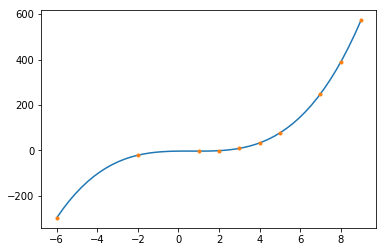

In [260]:
# простая реализация Метода Ньютона
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

def simple_newton(func, dfunc, a, b, tol = 1e-12, m = 1):
    last3x = np.zeros(3)
    u = lambda x: func(x)/dfunc(x)
    sol = 0#float('nan')
    iteration = 0
    x = (a + b) / 2.0
    for i in range(30):
        if abs(func(x))<tol:
            sol = x
            return [sol, iteration, last3x]
        iteration = i + 1
        df = dfunc(x)
        f = func(x)
        
        if (df == 0):
            dx = b - a
        else:
            if (iteration >= 3):
                m = max(1, int((last3x[2]-last3x[1])/(u(last3x[2])-u(last3x[1]))))
            dx = -m*func(x)/df
        x = x + dx
        last3x[0] = last3x[1]
        last3x[1] = last3x[2]
        last3x[2] = x
        
        if (last3x[2] == last3x[0]):
            x = x + dx
        
        if abs(dx) < tol:
            sol = x
            return [sol, iteration, last3x]
    sol = float('nan')
    print('More then 30 iterations!')
    return [sol, iteration, last3x]

#####################################################3

%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

def lagranz(net, t):
    func = 0
    for j in range(len(net[0])):
        numer = 1 
        denom = 1
        for i in range(len(net[1])):
            if (i != j): 
                numer = numer * (t - net[0][i])
                denom = denom * (net[0][j] - net[0][i])
        func = func + net[1][j] * numer / denom
    return func

net = [[2,5,-6,7,4,3,8,9,1,-2],[-1,77,-297,249,33,9,389,573,-3,-21]]

t = sp.symbols('t')
#print(lagranz(net, t))
func0 = lambda t: lagranz(net, t)

x = np.linspace(np.min(net[0]),np.max(net[0]))
y = func0(x)
plt.plot(x, y)
plt.plot(net[0], net[1], '.')

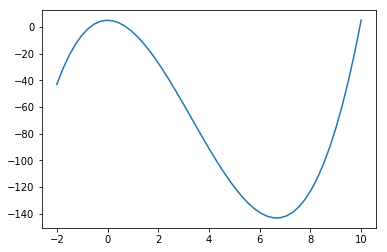

In [236]:
x = np.linspace(-2,10)
func0 = lambda x: x**3 - 10*x**2 + 5
dfunc0 = lambda x: 3*x**2 - 20*x
y = func0(x)
plt.plot(x, y)

In [237]:
# нулевая производная
#data = simple_newton(func0, dfunc0, 8)
#data = simple_newton(func0, dfunc0, 0.7)
data = simple_newton(func0, dfunc0, -2, 0)
print('sol = ', data[0])
print('iter = ', data[1])


sol =  -0.6840945657036894
iter =  5


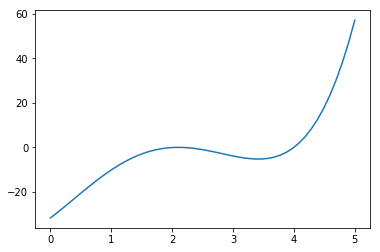

In [238]:
x = np.linspace(0,5)
func1 = lambda x: x**4 - 6.4*x**3 + 6.45*x**2 + 20.538*x - 31.752 #double root
dfunc1 = lambda x: 4.0*x**3 - 19.2*x**2 + 12.9*x + 20.538
y = func1(x)
plt.plot(x, y)

In [239]:
# кратные корни
data = simple_newton(func1, dfunc1, 0, 3)#, 1e-12, 2)
print('sol = ', data[0])
print('iter = ', data[1])

sol =  2.0999999993089995
iter =  5


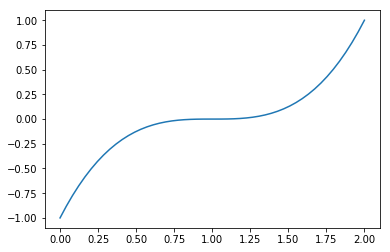

In [240]:
x = np.linspace(0,2)
func2 = lambda x: (x-1)**3
dfunc2 = lambda x: 3*(x-1)**2
y = func2(x)
plt.plot(x, y)

In [241]:
data = simple_newton(func2, dfunc2, -2, 2)#, 1e-12, 3)
print('sol = ', data[0])
print('iter = ', data[1])

sol =  1.0
iter =  4


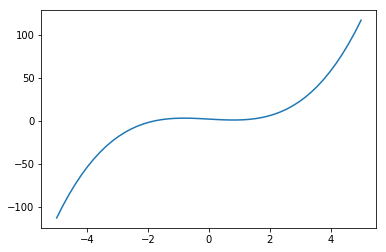

In [242]:
# биения
#x = np.linspace(-0.5,1.5)
x = np.linspace(-5,5)
func3 = lambda x: x**3 - 2*x + 2
dfunc3 = lambda x: 3*x**2 - 2
y = func3(x)
plt.plot(x, y)

In [243]:
#data = simple_newton(func3, dfunc3, 0.5)
data = simple_newton(func3, dfunc3, -2, 2)
print('sol = ', data[0])
print('iter = ', data[1])

sol =  -1.7692923542386314
iter =  18


## Обращение Якобиана для метода Ньютона с помощью пакета sympy

In [244]:
import sympy as sp
from sympy import exp
sp.init_printing(use_unicode=True)
x, y = sp.symbols('x y')
B = sp.Matrix([x**2 + y**2 - 1, exp(x) - exp(y) - 1])
B.jacobian(sp.Matrix([x, y])).inv()
#A = sp.Matrix([[2*x, 2*y],[exp(x),-exp(y)]])
#A.inv()

⎡        y                       ⎤
⎢       ℯ               2⋅y      ⎥
⎢───────────────  ───────────────⎥
⎢     y        x       y        x⎥
⎢2⋅x⋅ℯ  + 2⋅y⋅ℯ   2⋅x⋅ℯ  + 2⋅y⋅ℯ ⎥
⎢                                ⎥
⎢        x                       ⎥
⎢       ℯ              -2⋅x      ⎥
⎢───────────────  ───────────────⎥
⎢     y        x       y        x⎥
⎣2⋅x⋅ℯ  + 2⋅y⋅ℯ   2⋅x⋅ℯ  + 2⋅y⋅ℯ ⎦

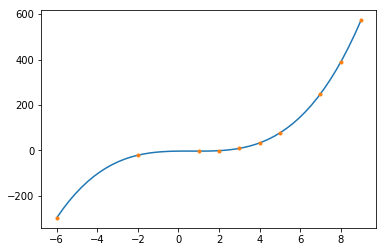

In [259]:
# простая реализация Метода Ньютона
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

def lagranz(net, t):
    func = 0
    for j in range(len(net[0])):
        numer = 1 
        denom = 1
        for i in range(len(net[1])):
            if (i != j): 
                numer = numer * (t - net[0][i])
                denom = denom * (net[0][j] - net[0][i])
        func = func + net[1][j] * numer / denom
    return func

net = [[2,5,-6,7,4,3,8,9,1,-2],[-1,77,-297,249,33,9,389,573,-3,-21]]

t = sp.symbols('t')
#print(lagranz(net, t))
func0 = lambda t: lagranz(net, t)

x = np.linspace(np.min(net[0]),np.max(net[0]))
y = func0(x)
plt.plot(x, y)
plt.plot(net[0], net[1], '.')